In [477]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../data/pl_matches_final.csv')

data = data[data['date'] > '2025-01-01']
data.sort_values(by='date', inplace=True)

In [478]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test  = data.iloc[train_size:]
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

X_train = train.drop(columns=['home_result', 'date', 'match_id'], axis=1)
y_train = train['home_result']
X_test  = test.drop(columns=['home_result', 'date', 'match_id'], axis=1)
y_test  = test['home_result']

Train shape: (417, 59), Test shape: (105, 59)


In [479]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=2000, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Draw', 'Loss', 'Win']))

[[ 1 13 14]
 [ 2 28  8]
 [ 1 11 27]]
              precision    recall  f1-score   support

        Draw       0.25      0.04      0.06        28
        Loss       0.54      0.74      0.62        38
         Win       0.55      0.69      0.61        39

    accuracy                           0.53       105
   macro avg       0.45      0.49      0.43       105
weighted avg       0.47      0.53      0.47       105



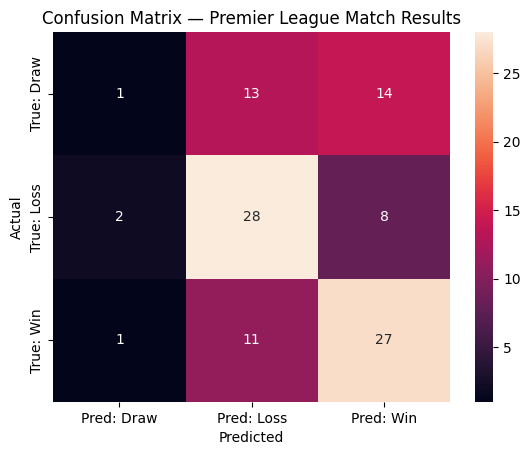

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True, fmt='d',
    xticklabels=['Pred: Draw', 'Pred: Loss', 'Pred: Win'],
    yticklabels=['True: Draw', 'True: Loss', 'True: Win']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Premier League Match Results')
plt.show()

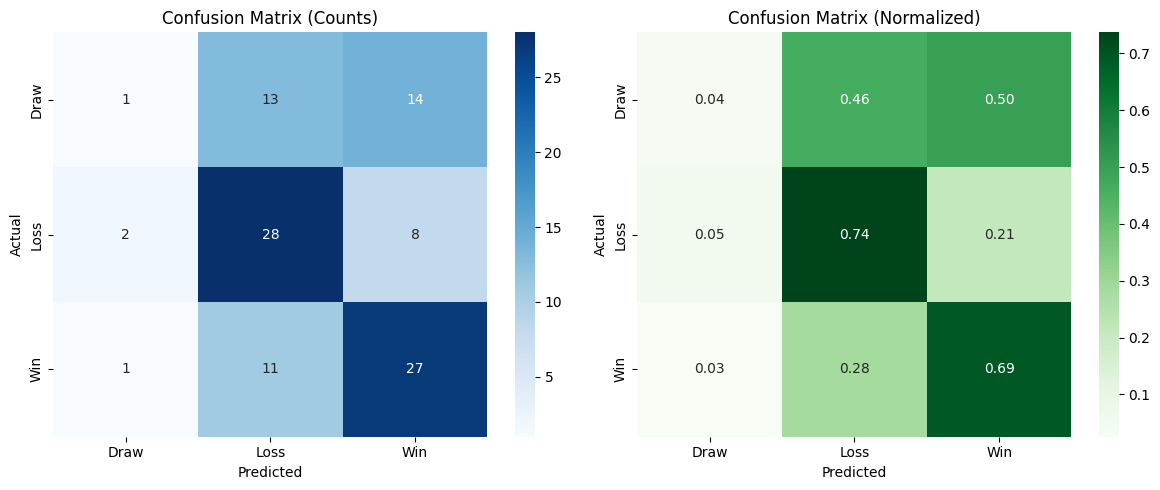


Classification Report:
              precision    recall  f1-score   support

        Draw       0.25      0.04      0.06        28
        Loss       0.54      0.74      0.62        38
         Win       0.55      0.69      0.61        39

    accuracy                           0.53       105
   macro avg       0.45      0.49      0.43       105
weighted avg       0.47      0.53      0.47       105



In [481]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')  # Normalized by true class

labels = ['Draw', 'Loss', 'Win']

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Standard confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix (Counts)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Normalized confusion matrix
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


C:\Users\emir_\AppData\Local\Temp\ipykernel_6248\2014410471.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=result_counts.values , palette='viridis')


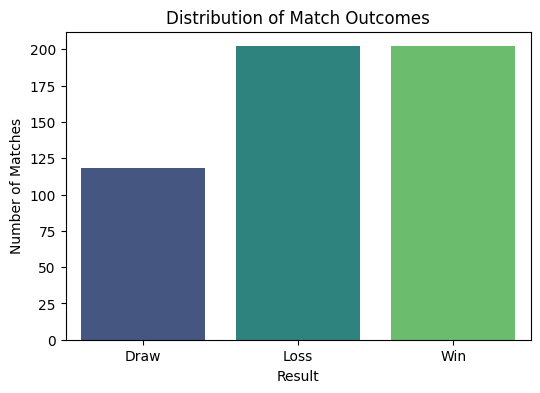

In [482]:
import matplotlib.pyplot as plt
import seaborn as sns

# Value counts
result_counts = data['home_result'].value_counts().sort_index()
labels = ['Draw', 'Loss', 'Win']

plt.figure(figsize=(6,4))
sns.barplot(x=labels, y=result_counts.values , palette='viridis')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.show()


C:\Users\emir_\AppData\Local\Temp\ipykernel_6248\1263405015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10], palette='viridis')


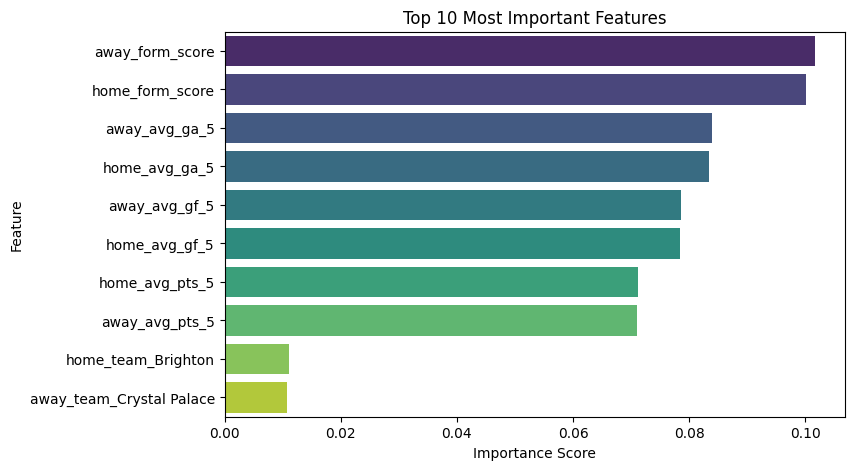

In [483]:
import pandas as pd
import numpy as np

# Get feature importances from your Random Forest
importances = rf.feature_importances_
features = X_train.columns

# Sort descending
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top 10
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10], palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


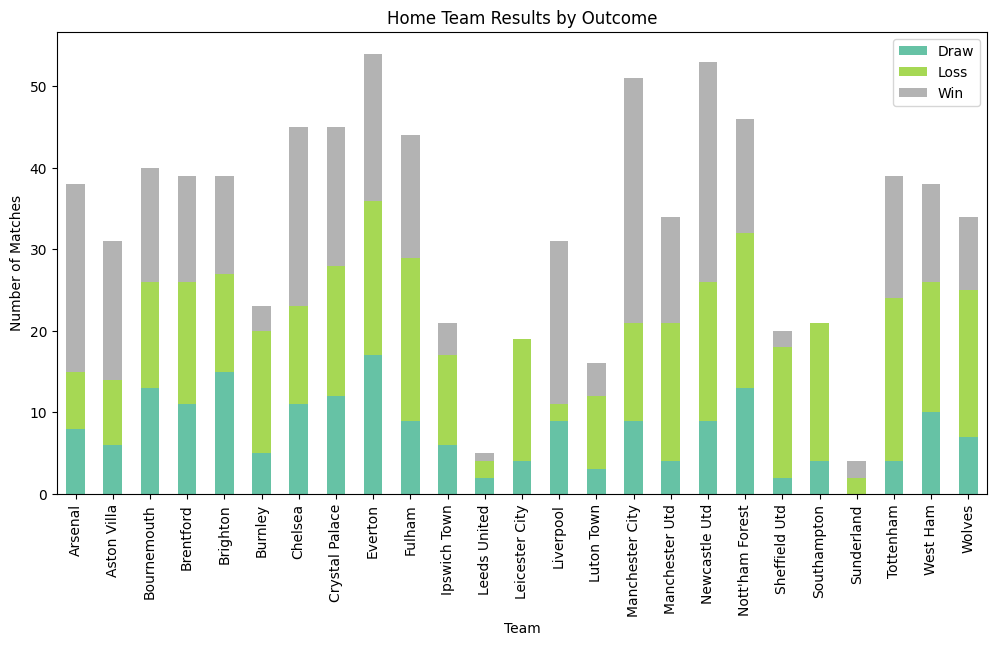

In [484]:
pl_matches = pd.read_csv('../data/pl_matches.csv')
team_results = pl_matches.groupby('home_team')['result'].value_counts().unstack().fillna(0)
team_results.columns = ['Draw', 'Loss', 'Win']

team_results.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Home Team Results by Outcome')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()


<Figure size 800x500 with 0 Axes>

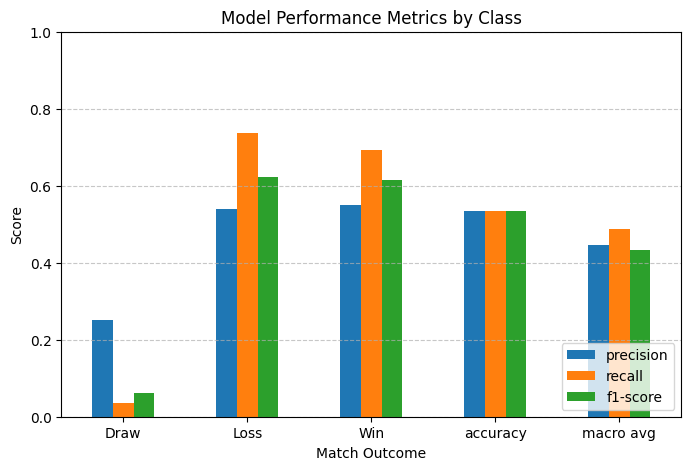

In [485]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, target_names=['Draw', 'Loss', 'Win'], output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:-1, :]  # remove accuracy row

plt.figure(figsize=(8,5))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,5))
plt.title("Model Performance Metrics by Class")
plt.xlabel("Match Outcome")
plt.ylabel("Score")
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


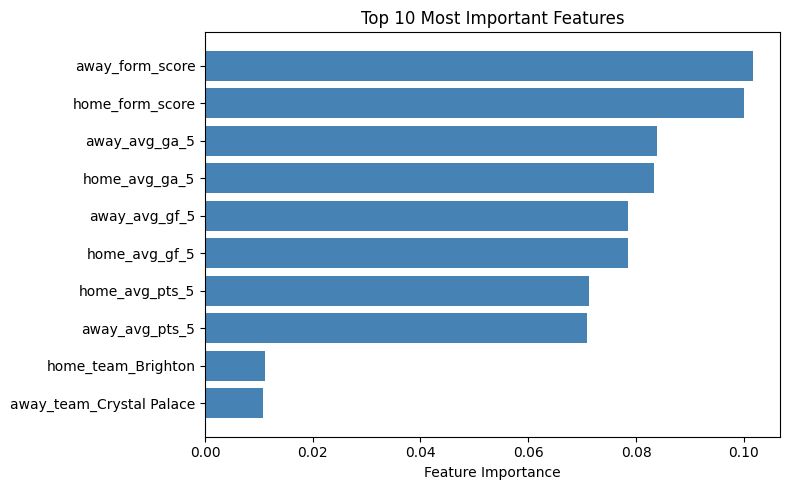

In [486]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10  # top 10 features
plt.figure(figsize=(8,5))
plt.barh(np.array(X_train.columns)[indices[:top_n]][::-1],
         importances[indices[:top_n]][::-1],
         color='steelblue')
plt.title("Top 10 Most Important Features")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [487]:
from sklearn.metrics import brier_score_loss
import numpy as np

# Get predicted probabilities for each class
y_proba = rf.predict_proba(X_test)

# Convert y_test to one-hot encoding (since Brier score needs probabilities for all classes)
from sklearn.preprocessing import label_binarize
classes = [0, 1, 2]  # Draw=0, Loss=1, Win=2
y_true_bin = label_binarize(y_test, classes=classes)

# Compute the mean Brier score across all classes
brier_scores = []
for i, c in enumerate(classes):
    brier = brier_score_loss(y_true_bin[:, i], y_proba[:, i])
    brier_scores.append(brier)

overall_brier = np.mean(brier_scores)
print(f"Brier scores per class: {dict(zip(['Draw', 'Loss', 'Win'], brier_scores))}")
print(f"Overall mean Brier score: {overall_brier:.4f}")


Brier scores per class: {'Draw': 0.20335109285714284, 'Loss': 0.21723905714285713, 'Win': 0.2194292642857143}
Overall mean Brier score: 0.2133


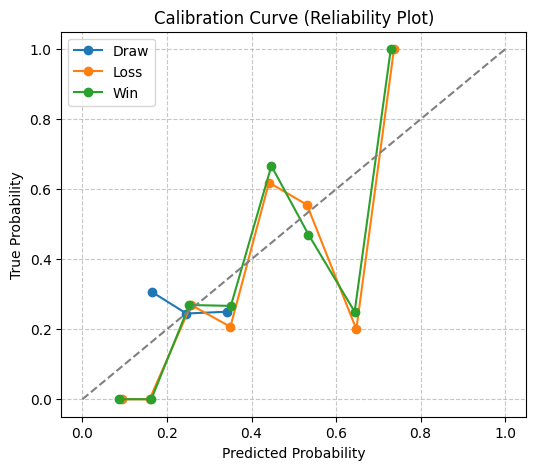

In [488]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
for i, label in enumerate(['Draw', 'Loss', 'Win']):
    prob_true, prob_pred = calibration_curve(y_true_bin[:, i], y_proba[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f'{label}')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Calibration Curve (Reliability Plot)")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


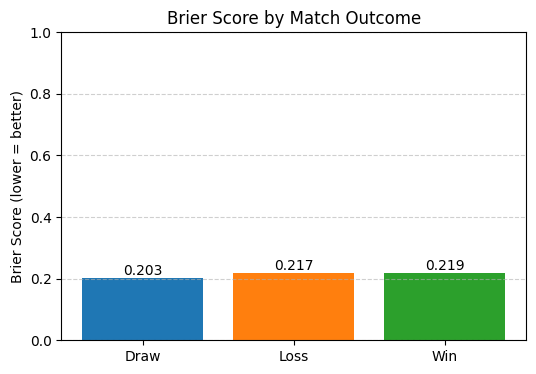

In [489]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
bars = plt.bar(['Draw', 'Loss', 'Win'], brier_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Brier Score by Match Outcome')
plt.ylabel('Brier Score (lower = better)')
plt.ylim(0, 1)
plt.bar_label(bars, fmt='%.3f')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [490]:
home_baseline_acc = (y_test == 2).mean()
print(f"Baseline (Always Home Win): {home_baseline_acc:.2f}")


Baseline (Always Home Win): 0.37


In [491]:
most_common = y_train.value_counts().idxmax()
print(most_common)
freq_baseline_acc = (y_test == most_common).mean()
print(f"Baseline (Most Frequent Class = {most_common}): {freq_baseline_acc:.2f}")


1
Baseline (Most Frequent Class = 1): 0.36


In [492]:
data['home_result'].value_counts()

home_result
2    202
1    202
0    118
Name: count, dtype: int64